# Advanced Lane Finding Project - [P2_01_05_Radius_of_Curvature_Position.ipynb](.P2_01_05_Radius_of_Curvature_Position)

### Camera Calibration

Compute the camera matrix and distortion coefficients.

Output images appear in the [./output_images](./output_images) folder.

In [1]:
# Camera Calibration
# Compute the camera matrix and distortion coefficients.

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.path import Path        # Draw polyline for transform points
import matplotlib.patches as patches    # Draw polyline for transform points
import os
from os import path
import scipy.misc          # Easily save thresholded images from 64-bit matrices

%matplotlib qt
%matplotlib inline



# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = sorted(glob.glob('./camera_cal/calibration*.jpg'))

# Step through the list of provided calibration images and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners (9 x 6)
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

    # If found, add object points, image points
    if ret == True:
        
        # Save image and show original image in left subplot
        outfname = fname.replace("camera_cal", "output_images") 
        outfname = outfname.replace(".jpg", ".png")
        cv2.imwrite(outfname, img)
        
        # Convert color for inline matplotlib display
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
#         fig, ax = plt.subplots(1, 2, figsize=(16,5))
#         fig.tight_layout()
#         ax[0].set_title(fname + ' || Original Chessboard Image')
#         ax[0].imshow(img)
        
        # Object & Image points
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cc_img = cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        
        # Show image in external window
        # cv2.imshow('img',img)
        # cv2.waitKey(500)
        
        # Save image and show in right subplot with identified corners
        outfname = fname.replace("camera_cal", "output_images") 
        outfname = outfname.replace(".jpg", "_corners.png")
        cv2.imwrite(outfname, cc_img)
        
        # Convert color for inline matplotlib display
        cc_img = cv2.cvtColor(cc_img, cv2.COLOR_BGR2RGB)
        
#         ax[1].set_title(outfname + ' || Chessboard Image with Identified Corners')
#         ax[1].imshow(cc_img)
        
#         # Save plot as image
#         outfname = outfname.replace("_corners.png", "_corners_plot.png") 
#         plt.savefig(outfname, bbox_inches='tight')
                
# cv2.destroyAllWindows()


#### Calibration and Image Undistortion

Undistort the chessboard images using the object points and image points from the previous cell.

Output images appear in the [./output_images](./output_images) folder.

In [2]:
# Take an image, object points, and image points,
# perform camera calibration, image distortion correction, and 
# return the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    return undist



# Apply identified corners to undistort images
for fname in images:
    img = cv2.imread(fname)

    undistorted_img = cal_undistort(img, objpoints, imgpoints)
    
    # Show image in external window
    # cv2.imshow('undistorted_img',undistorted_img)
    # cv2.waitKey(500)
    
    # Save undistorted image
    outfname = fname.replace("camera_cal", "output_images")
    outfname = outfname.replace(".jpg", "_undistorted.png") 
    cv2.imwrite(outfname, undistorted_img)
    
    # Convert color for inline matplotlib display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    undistorted_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)
    
#     # Show original and final output images
#     fig, ax = plt.subplots(1, 2, figsize=(16,5))
#     fig.tight_layout()
#     ax[0].set_title(fname + ' || Original Image')
#     ax[0].imshow(img)
#     ax[1].set_title(outfname + ' || Undistorted Image')
#     ax[1].imshow(undistorted_img)

#     # Save plot as image
#     outfname = outfname.replace("_undistorted.png", "_undistorted_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
        
cv2.destroyAllWindows()

### Pipeline - Single (Still) Images

1. Provide an example of a distortion-corrected image.

In [3]:
# Pipeline - Single (Still) Images
# 1. Provide an example of a distortion-corrected image.

# Make a list of calibration images
images = sorted(glob.glob('./test_images/*.jpg'))

# Apply identified corners to undistort images
for fname in images:
    img = cv2.imread(fname)

    undistorted_img = cal_undistort(img, objpoints, imgpoints)
    
    # Show image in external window
    # cv2.imshow('undistorted_img',undistorted_img)
    # cv2.waitKey(500)
    
    # Save undistorted image
    outfname = fname.replace("test_images", "output_images")
    outfname = outfname.replace(".jpg", "_undistorted.png") 
    cv2.imwrite(outfname, undistorted_img)

    # Convert color for inline matplotlib display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    undistorted_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)
    
#     # Show original and final output images
#     fig, ax = plt.subplots(1, 2, figsize=(16,5))
#     fig.tight_layout()
#     ax[0].set_title(fname + ' || Original Image')
#     ax[0].imshow(img)
#     ax[1].set_title(outfname + ' || Undistorted Image')
#     ax[1].imshow(undistorted_img)

#     # Save plot as image
#     outfname = outfname.replace("_undistorted.png", "_undistorted_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
        
cv2.destroyAllWindows()

2. Discuss how color transforms, gradients, or other methods to create a thresholded binary image were used.  Identify where this was used in the source code.  Provide an example of a binary image result.

In [4]:
# 2. Discuss how color transforms, gradients, or other methods to create a thresholded binary image were used.  
#    Identify where this was used in the source code.  
#    Provide an example of a binary image result.

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
def abs_sobel_thresh(img, orient, sobel_kernel, thresh):
    
    # Convert to grayscale
    # gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = img
    
    # Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        #print("Calculating the derivative (Sobel) in the", orient, "direction.")
        sobel_gray = cv2.Sobel(gray, cv2.CV_64F, 1, 0, sobel_kernel) # Derivative in the x-direction
    elif orient == 'y':
        #print("Calculating the derivative (Sobel) in the", orient, "direction.")
        sobel_gray = cv2.Sobel(gray, cv2.CV_64F, 0, 1, sobel_kernel) # Derivative in the y-direction
    else:
        # print("I cannot Sobel in the", orient, "direction!")
        # print("Calculating the derivative (Sobel) in the", orient, "direction.")
        sobel_gray = cv2.Sobel(gray, cv2.CV_64F, 1, 0, sobel_kernel) # Derivative in the x-direction

    # Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel_gray)

    # Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

    # Create a mask of 1's where the scaled gradient magnitude is > thresh_min and < thresh_max
    sobel_binary = np.zeros_like(scaled_sobel)
    sobel_binary[(scaled_sobel > thresh[0]) & (scaled_sobel < thresh[1])] = 1

    # 6) Return this mask as your binary_output image
    abs_sobel_thresh_binary_output = np.copy(sobel_binary)
    
    return abs_sobel_thresh_binary_output
    

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold    
def mag_thresh(img, sobel_kernel, mag_thresh):
    
    # 1) Convert to grayscale
    # gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = img
    
    # Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # Calculate the gradient magnitude
    abs_sobelxy = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))
    
    # Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    
    # Create a binary mask where mag thresholds are met
    sobel_binary = np.zeros_like(scaled_sobel)
    sobel_binary[(scaled_sobel > mag_thresh[0]) & (scaled_sobel < mag_thresh[1])] = 1

    # Return this mask as your binary_output image
    mag_binary_output = np.copy(sobel_binary) # Not really necessary.  Could just return sobel_binary
    
    return mag_binary_output



# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel, thresh):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = img
    
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

    # 3) Take the absolute value of the x and y gradients
    # abs_sobelxy = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))
    abs_sobelx = np.sqrt(sobelx**2)
    abs_sobely = np.sqrt(sobely**2)

    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    grad_dir = np.arctan2(abs_sobely, abs_sobelx)
    
    # 5) Create a binary mask where direction thresholds are met
    dir_binary_output = np.zeros_like(grad_dir)
    dir_binary_output[(grad_dir > thresh[0]) & (grad_dir < thresh[1])] = 1
    
    # 6) Return this mask as your binary_output image
    # binary_output = np.copy(img) # Remove this line
    return dir_binary_output



# Apply a theshold to an individual channel
# or grayscale image
def channel_thresh(channel, threshold):
    binary = np.zeros_like(channel)
    binary[(channel >= threshold[0]) & (channel <= threshold[1])] = 1
    
    return binary



# Sobel kernel size
ksize = 11 # Larger odd number will smooth gradient measurements

# Gather undistorted road test images
images = sorted(glob.glob('./output_images/*_undistorted.png'))

road_images = []

for image in images:
    if "test" in image or "straight" in image:
        road_images.append(image)

# Loop through road test images. Separate color channels in RGB and HLS
for fname in road_images:
    img = cv2.imread(fname)

    # Create grayscale image and save
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    outfname = fname.replace("_undistorted.png", "_undistorted_gray.png") 
    cv2.imwrite(outfname, gray)
    
    # Create RGB image and save individual channels
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    outfname = fname.replace("_undistorted.png", "_undistorted_RGB.png") 
    cv2.imwrite(outfname, rgb)
    
    r_channel = rgb[:,:,0]
    outfname = fname.replace("_undistorted.png", "_undistorted_R_channel.png") 
    cv2.imwrite(outfname, r_channel)

    g_channel = rgb[:,:,1]
    outfname = fname.replace("_undistorted.png", "_undistorted_G_channel.png") 
    cv2.imwrite(outfname, g_channel)
    
    b_channel = rgb[:,:,2]
    outfname = fname.replace("_undistorted.png", "_undistorted_B_channel.png") 
    cv2.imwrite(outfname, b_channel)
    
    # Create HLS image and save individual channels
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    outfname = fname.replace("_undistorted.png", "_undistorted_HLS.png") 
    cv2.imwrite(outfname, hls)
    
    h_channel = hls[:,:,0]
    outfname = fname.replace("_undistorted.png", "_undistorted_H_channel.png") 
    cv2.imwrite(outfname, h_channel)

    l_channel = hls[:,:,1]
    outfname = fname.replace("_undistorted.png", "_undistorted_L_channel.png") 
    cv2.imwrite(outfname, l_channel)
    
    s_channel = hls[:,:,2]
    outfname = fname.replace("_undistorted.png", "_undistorted_S_channel.png") 
    cv2.imwrite(outfname, s_channel)
    
#     # Show original and grayscale output image
#     fig, ax = plt.subplots(1, 2, figsize=(16, 5))
#     fig.tight_layout()
#     ax[0].set_title(fname + " || RGB")
#     ax[0].imshow(rgb)
#     ax[1].set_title(fname + " || Gray")
#     ax[1].imshow(gray, cmap='gray')   
    
#     # Save plot as image
#     outfname = fname.replace("_undistorted.png", "_undistorted_RGB_gray_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
    
#     # Show individual channels
#     fig, ax = plt.subplots(1, 3, figsize = (16, 5))
#     fig.tight_layout()
#     ax[0].set_title(fname + " || R channel")
#     ax[0].imshow(r_channel, cmap='gray')
#     ax[1].set_title(fname + " || G channel")
#     ax[1].imshow(g_channel, cmap='gray')
#     ax[2].set_title(fname + " || B channel")
#     ax[2].imshow(b_channel, cmap='gray')
    
#     # Save plot as image
#     outfname = fname.replace("_undistorted.png", "_undistorted_RGB_channels_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
    
#     # Show HLS and individual channels
#     fig, ax = plt.subplots(2, 2, figsize = (16, 10))
#     fig.tight_layout()
#     ax[0,0].set_title(fname + " || HLS")
#     ax[0,0].imshow(hls)
#     ax[0,1].set_title(fname + " || H channel")
#     ax[0,1].imshow(h_channel, cmap='gray')
#     ax[1,0].set_title(fname + " || L channel")
#     ax[1,0].imshow(l_channel, cmap='gray')
#     ax[1,1].set_title(fname + " || S channel")
#     ax[1,1].imshow(s_channel, cmap='gray')
    
#     # Save plot as image
#     outfname = fname.replace("_undistorted.png", "_undistorted_HLS_channels_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
    
#     # Separate images with horizontal line
#     fig, ax = plt.subplots(1, 1, figsize = (20, 1))
#     fig.tight_layout()
#     plt.axis('off')
#     ax.hlines(0, 0, 1, color='k')
    
    ##################################################################
    ### Apply Thresholds
    ##################################################################
    
    # S CHANNEL: Apply each of the thresholding functions
    gradx_s = abs_sobel_thresh(s_channel, orient='x', sobel_kernel=ksize, thresh=(10, 100))
    grady_s = abs_sobel_thresh(s_channel, orient='y', sobel_kernel=ksize, thresh=(20, 100))
    mag_binary_s = mag_thresh(s_channel, sobel_kernel=ksize, mag_thresh=(20, 100))
    dir_binary_s = dir_threshold(s_channel, sobel_kernel=ksize, thresh=(0.5, 1.3))
    s_binary = channel_thresh(channel=s_channel, threshold=(170, 255))
    combined_s = np.zeros_like(dir_binary_s)
    combined_s[ (s_binary == 1) | (((gradx_s == 1) & (grady_s == 1)) | 
                                   ((mag_binary_s == 1) & (dir_binary_s == 1))) ] = 1

    # R CHANNEL: Apply each of the thresholding functions
    gradx_r = abs_sobel_thresh(r_channel, orient='x', sobel_kernel=ksize, thresh=(10, 100))
    grady_r = abs_sobel_thresh(r_channel, orient='y', sobel_kernel=ksize, thresh=(20, 100))
    mag_binary_r = mag_thresh(r_channel, sobel_kernel=ksize, mag_thresh=(20, 100))
    dir_binary_r = dir_threshold(r_channel, sobel_kernel=ksize, thresh=(0.5, 1.3))
    r_binary = channel_thresh(channel=r_channel, threshold=(220, 255))
    combined_r = np.zeros_like(dir_binary_r)
    combined_r[ (r_binary == 1) | (((gradx_r == 1) & (grady_r == 1)) | 
                                   ((mag_binary_r == 1) & (dir_binary_r == 1))) ] = 1

    # B CHANNEL: Apply each of the thresholding functions
    gradx_b = abs_sobel_thresh(b_channel, orient='x', sobel_kernel=ksize, thresh=(10, 100))
    grady_b = abs_sobel_thresh(b_channel, orient='y', sobel_kernel=ksize, thresh=(20, 100))
    mag_binary_b = mag_thresh(b_channel, sobel_kernel=ksize, mag_thresh=(20, 100))
    dir_binary_b = dir_threshold(b_channel, sobel_kernel=ksize, thresh=(0.5, 1.3))
    b_binary = channel_thresh(channel=b_channel, threshold=(220, 255))
    combined_b = np.zeros_like(dir_binary_b)
    combined_b[ (b_binary == 1) | (((gradx_b == 1) & (grady_b == 1)) | 
                                   ((mag_binary_b == 1) & (dir_binary_b == 1))) ] = 1

#     # Plot the result: S channel
#     fig, ax = plt.subplots(1, 1, figsize=(20, 20))
#     fig.tight_layout()
#     ax.imshow(s_channel, cmap='gray')
#     ax.set_title(fname + ' || S Channel')
    
#     fig, ax = plt.subplots(2, 3, figsize=(16, 7))
#     fig.tight_layout()
#     ax[0,0].imshow(s_binary, cmap='gray')
#     ax[0,0].set_title('Thresholded Binary: S Channel')
#     ax[0,1].imshow(gradx_s, cmap='gray')
#     ax[0,1].set_title('Thresholded Gradient X: S Channel')
#     ax[0,2].imshow(grady_s, cmap='gray')
#     ax[0,2].set_title('Thresholded Gradient Y: S Channel')
#     ax[1,0].imshow(mag_binary_s, cmap='gray')
#     ax[1,0].set_title('Magnitute Gradient: S Channel')
#     ax[1,1].imshow(dir_binary_s, cmap='gray')
#     ax[1,1].set_title('Directional Gradient: S Channel')
#     ax[1,2].imshow(combined_s, cmap='gray')
#     ax[1,2].set_title('Combined Channels: S Channel')

#     # Save plot as image
#     outfname = fname.replace("_undistorted.png", "_undistorted_S_channel_threshold_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')

#     # Plot the result: R channel
#     fig, ax = plt.subplots(1, 1, figsize=(20, 20))
#     fig.tight_layout()
#     ax.imshow(r_channel, cmap='gray')
#     ax.set_title(fname + ' || R Channel')
    
#     fig, ax = plt.subplots(2, 3, figsize=(16, 7))
#     fig.tight_layout()
#     ax[0,0].imshow(r_binary, cmap='gray')
#     ax[0,0].set_title('Thresholded Binary: R Channel')
#     ax[0,1].imshow(gradx_r, cmap='gray')
#     ax[0,1].set_title('Thresholded Gradient X: R Channel')
#     ax[0,2].imshow(grady_r, cmap='gray')
#     ax[0,2].set_title('Thresholded Gradient Y: R Channel')
#     ax[1,0].imshow(mag_binary_r, cmap='gray')
#     ax[1,0].set_title('Magnitute Gradient: R Channel')
#     ax[1,1].imshow(dir_binary_r, cmap='gray')
#     ax[1,1].set_title('Directional Gradient: R Channel')
#     ax[1,2].imshow(combined_r, cmap='gray')
#     ax[1,2].set_title('Combined Thresholds: R Channel')
    
#     # Save plot as image
#     outfname = fname.replace("_undistorted.png", "_undistorted_R_channel_threshold_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')

    # Plot the result: B channel
#     fig, ax = plt.subplots(1, 1, figsize=(20, 20))
#     fig.tight_layout()
#     ax.imshow(b_channel, cmap='gray')
#     ax.set_title(fname + ' || B Channel')
    
#     fig, ax = plt.subplots(2, 3, figsize=(16, 7))
#     fig.tight_layout()
#     ax[0,0].imshow(b_binary, cmap='gray')
#     ax[0,0].set_title('Thresholded Binary: B Channel')
#     ax[0,1].imshow(gradx_b, cmap='gray')
#     ax[0,1].set_title('Thresholded Gradient X: B Channel')
#     ax[0,2].imshow(grady_b, cmap='gray')
#     ax[0,2].set_title('Thresholded Gradient Y: B Channel')
#     ax[1,0].imshow(mag_binary_b, cmap='gray')
#     ax[1,0].set_title('Magnitute Gradient: B Channel')
#     ax[1,1].imshow(dir_binary_b, cmap='gray')
#     ax[1,1].set_title('Directional Gradient: B Channel')
#     ax[1,2].imshow(combined_b, cmap='gray')
#     ax[1,2].set_title('Combined Channels: B Channel')

#     # Save plot as image
#     outfname = fname.replace("_undistorted.png", "_undistorted_B_channel_threshold_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
    
    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors

    # Combine R and B channels
    combined_rb = np.zeros_like(combined_b)
    combined_rb[ (combined_r == 1) | (combined_b == 1) ] = 1

    # Stack S and RB channels.  Save using SciPy
    color_binary = np.dstack((np.zeros_like(combined_s), combined_s, combined_rb))
    outfname = fname.replace("_undistorted.png", "_undistorted_stacked.png") 
    scipy.misc.imsave(outfname, color_binary)
    
    # Combine channels to get lane lines.  Save using SciPy
    combined = np.zeros_like(combined_b)
    combined[ (combined_s == 1) | ((combined_r == 1) | (combined_b == 1)) ] = 1
    outfname = fname.replace("_undistorted.png", "_undistorted_combined.png") 
    scipy.misc.imsave(outfname, combined)
    
#     # Plot the channel stack
#     fig, ax = plt.subplots(1, 2, figsize=(16, 5))
#     fig.tight_layout()
#     ax[0].imshow(color_binary)
#     ax[0].set_title('Stacked Channels')
#     ax[1].imshow(combined, cmap='gray')
#     ax[1].set_title('Combined Channels')
    
#     # Save plot as image
#     outfname = fname.replace("_undistorted.png", "_undistorted_stacked_combined_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
    
#     # Separate images with horizontal line
#     fig, ax = plt.subplots(1, 1, figsize = (20, 1))
#     fig.tight_layout()
#     plt.axis('off')
#     ax.hlines(0, 0, 1, color='k')

3. Discuss how the perspective transform was performed.  Identify where this was used in the source code.  Provide an example of a resulting transformed image.  

In [5]:
# Pipeline - Single (Still) Images
# 3. Discuss how the perspective transform was performed.  
#    Provide an example of a resulting transformed image.  

def transform_image(img, vertex_TR, vertex_BR, vertex_BL, vertex_TL, 
                    vertex_TR_xfm, vertex_BR_xfm, vertex_BL_xfm, vertex_TL_xfm):
    
    # Define calibration box in source and destination coordinates
    img_size = (img.shape[1], img.shape[0])
    
    # Source coordinates
    src = np.float32(
        [[vertex_TR[0], vertex_TR[1]],
         [vertex_BR[0], vertex_BR[1]],
         [vertex_BL[0], vertex_BL[1]],
         [vertex_TL[0], vertex_TL[1]]])
    
    # Destination coordinates
    dst = np.float32(
        [[vertex_TR_xfm[0], vertex_TR_xfm[1]],
         [vertex_BR_xfm[0], vertex_BR_xfm[1]],
         [vertex_BL_xfm[0], vertex_BL_xfm[1]],
         [vertex_TL_xfm[0], vertex_TL_xfm[1]]])
    
    # Compute perspective transform
    M = cv2.getPerspectiveTransform(src, dst)
    
    # Compute inverse perspective transform if necessary
    # Minv = cv2.getPerspectiveTransform(dst, src)
    
    # Transform (warp) the image using linear interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped



# Create ROI vertices, starting from Top Right (TR), clockwise 
vertex_TR = (685,  450)
vertex_BR = (1099, 720)
vertex_BL = (223,  720)
vertex_TL = (597,  450)

# Create transformed vertices, starting from Top Right (TR), clockwise 
vertex_TR_xfm = (980, 0)
vertex_BR_xfm = (980, 720)
vertex_BL_xfm = (300, 720)
vertex_TL_xfm = (300, 0)

vertices = [
   vertex_TR,
   vertex_BR,
   vertex_BL,
   vertex_TL,
   (0., 0.),  # ignored
]

vertices_xfm = [
   vertex_TR_xfm,
   vertex_BR_xfm,
   vertex_BL_xfm,
   vertex_TL_xfm,
   (0., 0.),  # ignored
]

pathcodes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(vertices, pathcodes)
path_xfm = Path(vertices_xfm, pathcodes)

# Gather thresholded (combined) images
images = sorted(glob.glob('./output_images/*_undistorted_combined.png'))

# Loop through combined thresholded images and original images.
for fname in images:
    img = cv2.imread(fname)
    
    # Transform combined thresholded image
    img_xfm = transform_image(img, vertex_TR, vertex_BR, vertex_BL, vertex_TL, vertex_TR_xfm, vertex_BR_xfm, vertex_BL_xfm, vertex_TL_xfm)
    outfname = fname.replace("_undistorted_combined.png", "_undistorted_combined_transformed.png")
    cv2.imwrite(outfname, img_xfm)
        
    # Transform the original image
    fname_original = fname.replace("_undistorted_combined.png", ".jpg")
    fname_original = fname_original.replace("./output_images/", "./test_images/")
    img_original = cv2.imread(fname_original)
    img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

    img_original_xfm = transform_image(img_original, vertex_TR, vertex_BR, vertex_BL, vertex_TL, 
                                       vertex_TR_xfm, vertex_BR_xfm, vertex_BL_xfm, vertex_TL_xfm)

#     # Plot the original transformed result:
#     fig, ax = plt.subplots(1, 2, figsize=(16, 5))
#     fig.tight_layout()
#     ax[0].imshow(img_original)
#     ax[0].set_title(fname_original)
#     patch = patches.PathPatch(path, edgecolor='purple', facecolor='None', lw=2)
#     ax[0].add_patch(patch)
#     ax[0].plot(vertex_TR[0], vertex_TR[1], 'o')
#     ax[0].plot(vertex_BR[0], vertex_BR[1], 'o')
#     ax[0].plot(vertex_BL[0], vertex_BL[1], 'o')
#     ax[0].plot(vertex_TL[0], vertex_TL[1], 'o')
#     ax[1].imshow(img_original_xfm)
#     ax[1].set_title(fname_original + ' || Bird\'s-Eye View Transform')
#     patch_xfm = patches.PathPatch(path_xfm, edgecolor='purple', facecolor='None', lw=2)
#     ax[1].add_patch(patch_xfm)
#     ax[1].plot(vertex_TR_xfm[0], vertex_TR_xfm[1], 'o')
#     ax[1].plot(vertex_BR_xfm[0], vertex_BR_xfm[1], 'o')
#     ax[1].plot(vertex_BL_xfm[0], vertex_BL_xfm[1], 'o')
#     ax[1].plot(vertex_TL_xfm[0], vertex_TL_xfm[1], 'o')

#     # Save plot as image
#     fname_original = fname_original.replace("./test_images/", "./output_images/")
#     fname_original = fname_original.replace(".jpg", "_transformed_plot.png")
#     plt.savefig(fname_original, bbox_inches='tight')    

#     # Plot the combined thresholdded transformed result:
#     fig, ax = plt.subplots(1, 2, figsize=(16, 5))
#     fig.tight_layout()
#     ax[0].imshow(img, cmap='gray')
#     ax[0].set_title(fname)
#     patch = patches.PathPatch(path, edgecolor='purple', facecolor='None', lw=2)
#     ax[0].add_patch(patch)
#     ax[0].plot(vertex_TR[0], vertex_TR[1], 'o')
#     ax[0].plot(vertex_BR[0], vertex_BR[1], 'o')
#     ax[0].plot(vertex_BL[0], vertex_BL[1], 'o')
#     ax[0].plot(vertex_TL[0], vertex_TL[1], 'o')
#     ax[1].imshow(img_xfm, cmap='gray')
#     ax[1].set_title(fname + ' || Bird\'s-Eye View Transform')
#     patch_xfm = patches.PathPatch(path_xfm, edgecolor='purple', facecolor='None', lw=2)
#     ax[1].add_patch(patch_xfm)
#     ax[1].plot(vertex_TR_xfm[0], vertex_TR_xfm[1], 'o')
#     ax[1].plot(vertex_BR_xfm[0], vertex_BR_xfm[1], 'o')
#     ax[1].plot(vertex_BL_xfm[0], vertex_BL_xfm[1], 'o')
#     ax[1].plot(vertex_TL_xfm[0], vertex_TL_xfm[1], 'o')

#     # Save plot as image
#     outfname = outfname.replace("_combined_transformed.png", "_combined_transformed_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')


4. Discuss how lane-line pixels were identified, and how their positions were fit with a polynomial.  Identify where this was used in the source code.

In [6]:
# Pipeline - Single (Still) Images
# 4. Discuss how lane-line pixels were identified, 
#    and how their positions were fit with a polynomial.  

# Create a histogram for found lane lines
def hist(img):
    # Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    bottom_half = img[img.shape[0]//2:,:]

    # Sum across image pixels vertically - make sure to set an `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram


# Find lane lines from transformed images
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 11
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low), (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low), (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img



# Fit polynomial for lane lines
def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return left_fit, right_fit, out_img



# # Gather thresholded (combined) images
# images = sorted(glob.glob('./output_images/*_undistorted_combined_transformed.png'))

# # Loop through thresholded images.
# for fname in images:
#     img = cv2.imread(fname)

#     # Build histogram.  Divide by 255 to normalize since using cv2.imread()
#     img_hist = hist(img) / 255

#     # Plot the result:
#     fig, ax = plt.subplots(1, 2, figsize=(16, 5))
#     fig.tight_layout()
#     ax[0].imshow(img, cmap='gray')
#     ax[0].set_title(images[0] + ' || Transformed')
#     patch_xfm = patches.PathPatch(path_xfm, edgecolor='purple', facecolor='None', lw=2)
#     ax[0].add_patch(patch_xfm)
#     ax[0].plot(vertex_TR_xfm[0], vertex_TR_xfm[1], 'o')
#     ax[0].plot(vertex_BR_xfm[0], vertex_BR_xfm[1], 'o')
#     ax[0].plot(vertex_BL_xfm[0], vertex_BL_xfm[1], 'o')
#     ax[0].plot(vertex_TL_xfm[0], vertex_TL_xfm[1], 'o')
#     ax[1].plot(img_hist)
#     ax[1].set_title(fname + ' || Histogram')
    
#     # Save plot as image
#     outfname = fname.replace("_combined_transformed.png", 
#                              "_combined_transformed_histogram_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')

#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     # Plot the result:
#     fig, ax = plt.subplots(1, 2, figsize=(16, 5))
#     fig.tight_layout()
#     # left_fit and right_fit are gathered for previous polynomial constants.  Not used in this section
#     left_fit, right_fit, img_poly = fit_polynomial(img) # This line needs to be below the plot declaraction to visualize properly
#     ax[0].imshow(img, cmap='gray')
#     ax[0].set_title(fname + ' || Transformed')
#     patch_xfm = patches.PathPatch(path_xfm, edgecolor='purple', facecolor='None', lw=2)
#     ax[0].add_patch(patch_xfm)
#     ax[0].plot(vertex_TR_xfm[0], vertex_TR_xfm[1], 'o')
#     ax[0].plot(vertex_BR_xfm[0], vertex_BR_xfm[1], 'o')
#     ax[0].plot(vertex_BL_xfm[0], vertex_BL_xfm[1], 'o')
#     ax[0].plot(vertex_TL_xfm[0], vertex_TL_xfm[1], 'o')
#     ax[0].set_ylim([720, 0])
#     ax[1].imshow(img_poly)
#     ax[1].set_title(fname + ' || Polyfit')
    
#     # Save plot as image
#     outfname = fname.replace("_combined_transformed.png", 
#                              "_combined_transformed_polyfit_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')


In [7]:
# Use the previous polynomial to skip the sliding window to increase efficiency

def fit_poly(img_shape, leftx, lefty, rightx, righty):
    # Fit a second order polynomial to each with np.polyfit()
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    
    # Calculate both polynomials using ploty, left_fit and right_fit
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty

def search_around_poly(binary_warped, weighted = 0, plot_poly = 0):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    margin = 20    # Original margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))
    lane_pts = np.hstack((left_line_window2, right_line_window1))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0, 0, 255))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (255, 0, 0))
    cv2.fillPoly(window_img, np.int_([lane_pts]), (0, 255, 0))

    if weighted == 1:
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 1)
    else:
        result = window_img
    
    if plot_poly == 1:
       # Plot the polynomial lines onto the image
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
    
    return result


# # Load images
# images = sorted(glob.glob('./output_images/*_undistorted_combined_transformed.png'))

# for fname in images:
#     img = cv2.imread(fname)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     # Get new polynomials for each image
#     leftx, lefty, rightx, righty, out_img = find_lane_pixels(img)

#     # Fit a second order polynomial to each using `np.polyfit`
#     left_fit = np.polyfit(lefty, leftx, 2)
#     right_fit = np.polyfit(righty, rightx, 2)

#     # Plot the result:
#     fig, ax = plt.subplots(1, 2, figsize=(16, 5))
#     fig.tight_layout()
#     ax[0].imshow(img, cmap='gray')
#     ax[0].set_title(fname + ' || Transformed')
#     patch_xfm = patches.PathPatch(path_xfm, edgecolor='purple', facecolor='None', lw=2)
#     ax[0].add_patch(patch_xfm)
#     ax[0].plot(vertex_TR_xfm[0], vertex_TR_xfm[1], 'o')
#     ax[0].plot(vertex_BR_xfm[0], vertex_BR_xfm[1], 'o')
#     ax[0].plot(vertex_BL_xfm[0], vertex_BL_xfm[1], 'o')
#     ax[0].plot(vertex_TL_xfm[0], vertex_TL_xfm[1], 'o')
#     ax[0].set_ylim([720, 0])
#     result = search_around_poly(img, weighted = 1, plot_poly = 1) # This line needs to be below the plot declaraction to visualize properly
#     ax[1].imshow(result),
#     ax[1].set_title(fname + ' || Polyfit from Prior Image')
    
#     # Save plot as image
#     outfname = fname.replace("_undistorted_combined_transformed.png", 
#                              "_undistorted_combined_transformed_polyfit_prev_plot.png") 
#     plt.savefig(outfname, bbox_inches='tight')
    

5. Discuss how the radius of curvature of the lane and the position of the vehicle with respect to center were calculated.  Identify where this was used in the source code.

./output_images/straight_lines1_undistorted_combined_transformed.png
	Radius of Curvature:	Left = 18094.606 meters,	Right = 4502.605 meters
	Vehicle is 0.090 meters left of center


./output_images/straight_lines2_undistorted_combined_transformed.png
	Radius of Curvature:	Left = 15672.558 meters,	Right = 7297.631 meters
	Vehicle is 0.193 meters left of center


./output_images/test1_undistorted_combined_transformed.png
	Radius of Curvature:	Left = 31297.385 meters,	Right = 1493.181 meters
	Vehicle is 0.196 meters right of center


./output_images/test2_undistorted_combined_transformed.png
	Radius of Curvature:	Left = 1877.239 meters,	Right = 1430.982 meters
	Vehicle is 0.103 meters right of center


./output_images/test3_undistorted_combined_transformed.png
	Radius of Curvature:	Left = 3088.742 meters,	Right = 2176.198 meters
	Vehicle is 0.050 meters right of center


./output_images/test4_undistorted_combined_transformed.png
	Radius of Curvature:	Left = 4859.825 meters,	Right = 1952.7

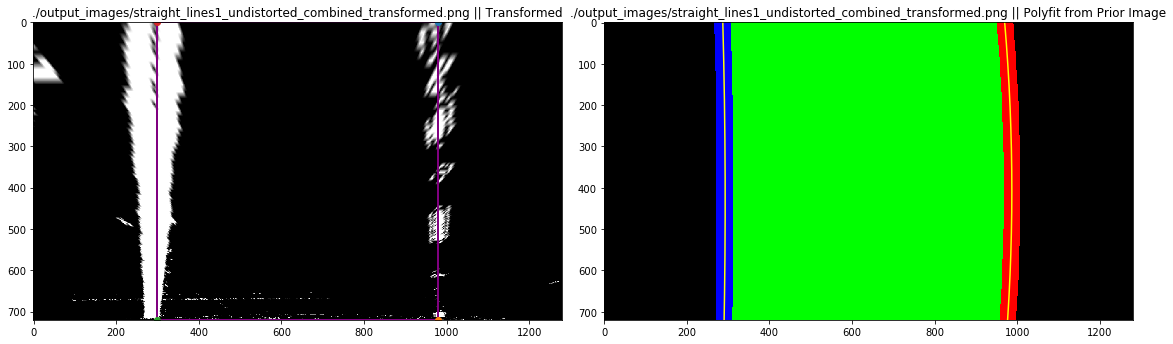

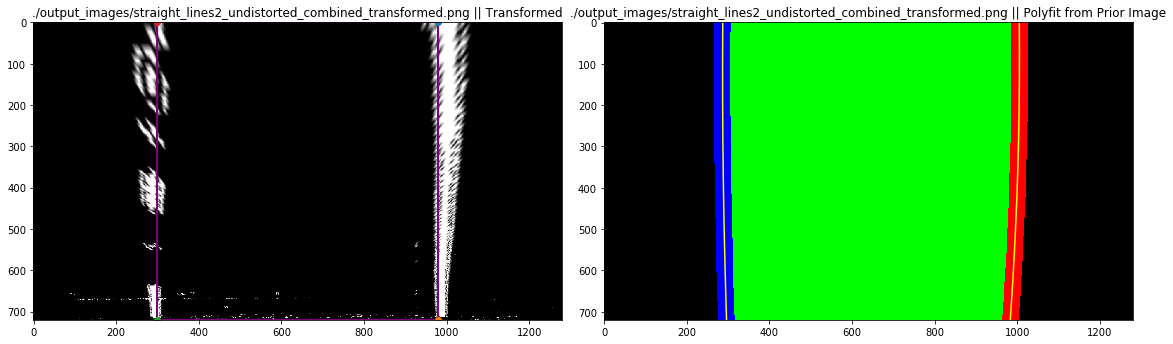

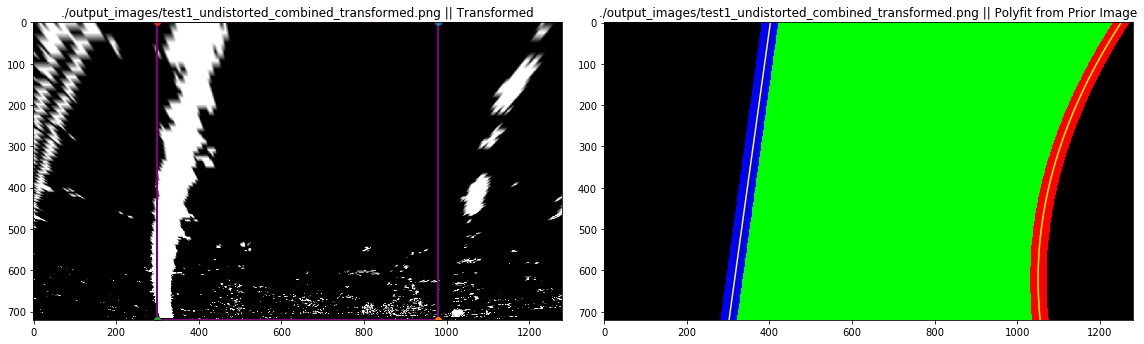

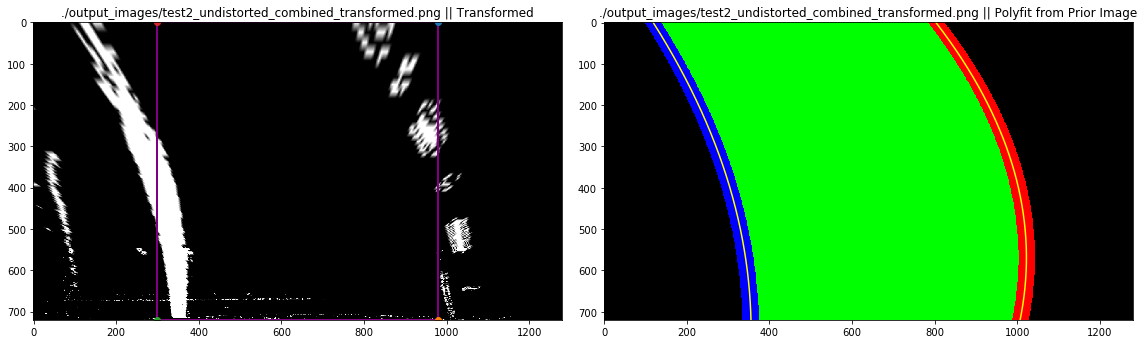

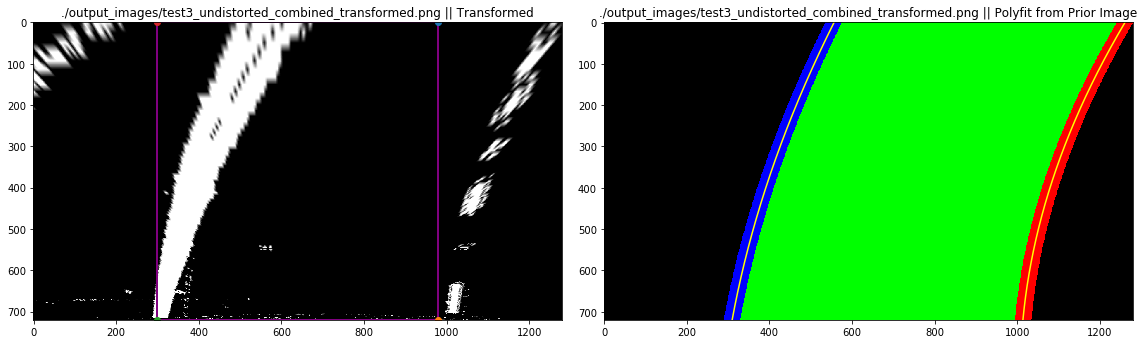

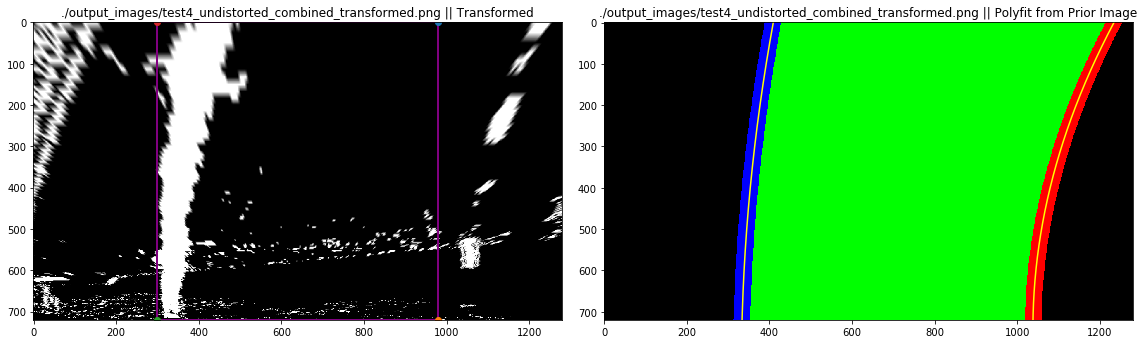

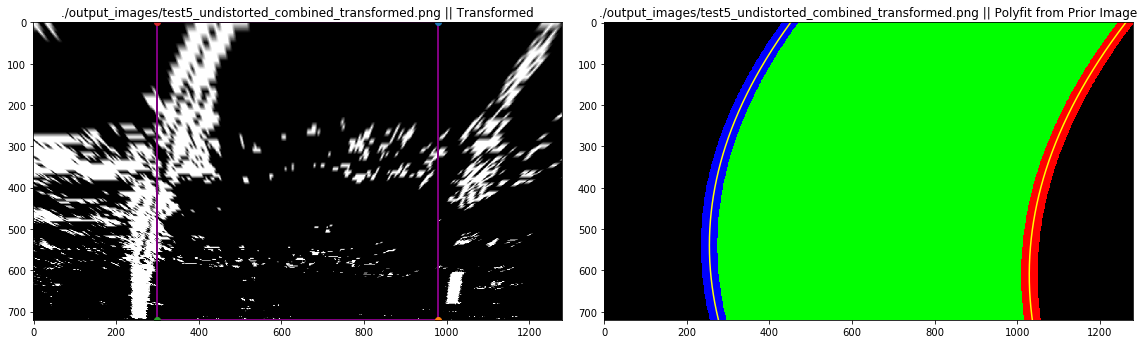

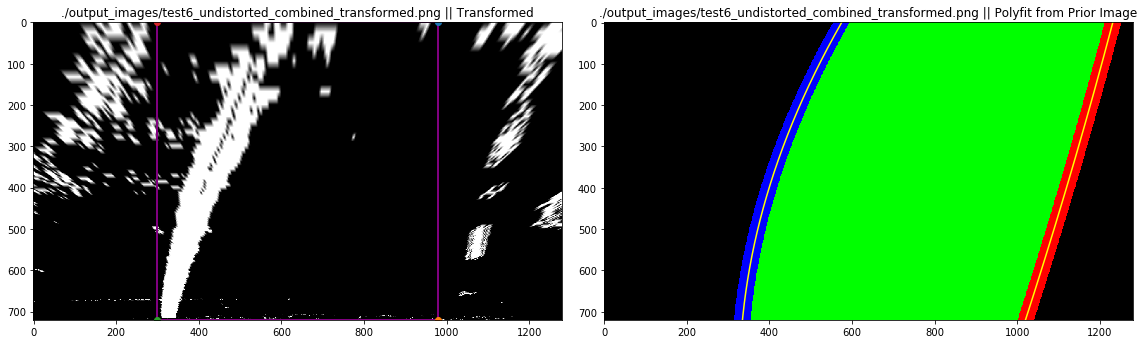

In [8]:
# Pipeline - Single (Still) Images
# 5. Discuss how the radius of curvature of the lane and the position of the vehicle 
#    with respect to center were calculated .  

# Measure lane curvature radius
def measure_curvature_real(left_fit, right_fit):
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    # Setup image height
    ploty = np.linspace(0, 719, num=720)# to cover same y-range as image

    # Feed in real data using imported polynomial fit data
    # ploty, left_fit_cr, right_fit_cr = generate_data(ym_per_pix, xm_per_pix)

    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    # Implement the calculation of R_curve (radius of curvature)
    # Performed to scale in the y-dimension (ym_per_pix)
    left_curverad = (1 + (2*left_fit[0]*y_eval*ym_per_pix + left_fit[1])**2)**(3/2) / np.abs(2*left_fit[0])
    right_curverad = (1 + (2*right_fit[0]*y_eval*ym_per_pix + right_fit[1])**2)**(3/2) / np.abs(2*right_fit[0])
    
    return left_curverad, right_curverad



# Load images
images = sorted(glob.glob('./output_images/*_undistorted_combined_transformed.png'))

for fname in images:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Get new polynomials for each image
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(img)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # Calculate radius of curvature
    left_radcurve, right_radcurve = measure_curvature_real(left_fit, right_fit)
    
    # Calculate and print radius of curvature and vehicle position
    print(fname)
    print("\tRadius of Curvature:\tLeft = %.3f meters,\tRight = %.3f meters" % (left_radcurve, right_radcurve))

    # Calculate vehicle distance from center of lane
    midpoint_px = (rightx[0] + leftx[0]) / 2
    center_px = (img.shape[1] / 2) - midpoint_px
    
    # Convert center point from pixels to meters
    center_m = center_px * (3.7 / 700)
    
    if center_m < 0:
        print("\tVehicle is %.3f meters right of center" % (abs(center_m)))
    else:
        print("\tVehicle is %.3f meters left of center" % (abs(center_m)))
        
    print("\n")
    
    # Plot the result:
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    fig.tight_layout()
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(fname + ' || Transformed')
    patch_xfm = patches.PathPatch(path_xfm, edgecolor='purple', facecolor='None', lw=2)
    ax[0].add_patch(patch_xfm)
    ax[0].plot(vertex_TR_xfm[0], vertex_TR_xfm[1], 'o')
    ax[0].plot(vertex_BR_xfm[0], vertex_BR_xfm[1], 'o')
    ax[0].plot(vertex_BL_xfm[0], vertex_BL_xfm[1], 'o')
    ax[0].plot(vertex_TL_xfm[0], vertex_TL_xfm[1], 'o')
    ax[0].set_ylim([720, 0])
    result = search_around_poly(img, weighted = 0, plot_poly = 1) # This line needs to be below the plot declaraction to visualize properly
    ax[1].imshow(result)
    ax[1].set_title(fname + ' || Polyfit from Prior Image')
    
    # Save plot as image
    outfname = fname.replace("_undistorted_combined_transformed.png", 
                             "_undistorted_combined_transformed_polyfit_prev_radcurve_plot.png") 
    plt.savefig(outfname, bbox_inches='tight')

# This is the end of [./P2_01_05_Radius_of_Curvature_Position.ipynb](./P2_01_05_Radius_of_Curvature_Position.ipynb)

All output videos can be found in the [./output_videos/](./output_videos/) folder.

All output images can be found in the [./output_images/](./output_images/) folder.